In [46]:
import random
import torch
import numpy
from d2l import torch as d2l

# print("Hello world")

def synthetic_data(w, b, num_examples):
  # 生成 y = w * x + b + 噪声
  # 生成服从高斯分布的的随机数，均值为0，标准差为1
  # 形状为【num_examples(样本数量)，len(w)特征向量长度】
  X = torch.normal(0, 1, (num_examples, len(w)))
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 0.01, y.shape)
  # y.reshape((-1, 1))的作用就是将y进行转置
  return X, y.reshape((-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2 
features, labels = synthetic_data(true_w, true_b, 1000)

print('features: ', features[0], '\nlabel[0]', labels[0])

features:  tensor([-0.9763,  0.1979]) 
label[0] tensor([1.5758])


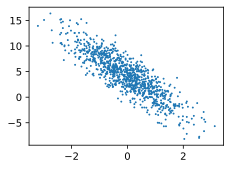

In [47]:
# 在python中
# 方法后面必须要加括号
# 例如：detach(), numpy()
# 属性后面不能加括号
# 例如：dtype, shape
d2l.set_figsize()
d2l.plt.scatter(features[ : ,1].detach().numpy(),
                labels.detach().numpy(), 1)
d2l.plt.show()

In [48]:
def data_iter(batch_size, features, labels):
  # features是一个1000 * 2的矩阵
  # 样本数量可以通过获取features矩阵的第一维长度计算得到
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  # range(start, end, step)
  for i in range(0, num_examples, batch_size):
    batch_indcies = torch.tensor(
      indices[i : min(i + batch_size, num_examples)]
    )
    # yield关键字不会终止函数的进行，而是暂停函数的进行
    # 在下一次调用时，从上次yield出继续进行
    # 下方语句就是产出了一个batch
    yield features[batch_indcies], labels[batch_indcies]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  break

tensor([[ 0.2071, -0.9069],
        [-0.0656,  1.6559],
        [-0.5750,  1.5346],
        [-0.0729, -0.9390],
        [-0.8244,  0.0739],
        [-0.4672, -0.8206],
        [-0.9390,  0.6865],
        [ 1.1316,  0.4079],
        [-2.7212,  1.3030],
        [-0.3348, -0.2773]]) 
 tensor([[ 7.6855e+00],
        [-1.5594e+00],
        [-2.1773e+00],
        [ 7.2464e+00],
        [ 2.3211e+00],
        [ 6.0600e+00],
        [-3.6045e-03],
        [ 5.0738e+00],
        [-5.6934e+00],
        [ 4.4617e+00]])


In [49]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [50]:
def linreg(X, w, b):
  """线型回归模型"""
  return torch.matmul(X, w) + b

In [ ]:
def squared_loss(y_hat, y):
  """定义均方误差"""
  # 注意括号别打错了
  return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [52]:
def sgd(params, lr, batch_size):
  # params: w和b
  # lr：学习率
  # batch_size：
  """小批量梯度下降"""
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size
      # 将梯度设置为0
      param.grad.zero_() 


In [ ]:
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    l = loss(net(X, w, b), y)
    # 在loss函数中对w进行求导
    # 因为已经将b纳入w中，所以相当于对[w, b]一起求导了
    # 使用sum求和后， l变为一个包含w1, w2, ... 的标量，对每个wi进行求导，最后得出w向量的梯度值 
    l.sum().backward()
    sgd([w, b], lr, batch_size)
  with torch.no_grad():
    train_l = loss(net(features, w, b), labels)
    print(f'epochs {epoch + 1}, loss {float(train_l.mean()):f}')
    

epochs 1, loss 0.029343
epochs 2, loss 0.000101
epochs 3, loss 0.000052
epochs 4, loss 0.000052
epochs 5, loss 0.000052
epochs 6, loss 0.000052
epochs 7, loss 0.000052
epochs 8, loss 0.000052
epochs 9, loss 0.000052
epochs 10, loss 0.000052
